# PROJET 8: Déployez un modèle dans le cloud

# 1 Préambule

## 1.1 Problématique

La très jeune start-up de l'AgriTech, nommée "Fruits!",
cherche à proposer des solutions innovantes pour la récolte des fruits.

La volonté de l’entreprise est de préserver la biodiversité des fruits
en permettant des traitements spécifiques pour chaque espèce de fruits
en développant des robots cueilleurs intelligents.

La start-up souhaite dans un premier temps se faire connaître en mettant
à disposition du grand public une application mobile qui permettrait aux
utilisateurs de prendre en photo un fruit et d'obtenir des informations sur ce fruit.

Pour la start-up, cette application permettrait de sensibiliser le grand public
à la biodiversité des fruits et de mettre en place une première version du moteur
de classification des images de fruits.

De plus, le développement de l’application mobile permettra de construire
une première version de l'architecture Big Data nécessaire.

## 1.3 Déroulement des étapes du projet

Le projet va être réalisé en 2 temps, dans deux environnements différents.
Nous allons dans un premier temps développer et exécuter notre code en local,
en travaillant sur un nombre limité d'images à traiter.

Une fois les choix techniques validés, nous déploierons notre solution
dans un environnement Big Data en mode distribué.

Pour cette raison, ce projet sera divisé en 3 parties:

1 Liste des choix techniques généraux retenus

2 Déploiement de la solution en local

3 Déploiement de la solution dans le cloud

# 2 Choix Techniques Généraux

## 2.1 Calcul distribué
L’énoncé du projet nous impose de développer des scripts en pyspark
afin de prendre en compte l’augmentation très rapide du volume
de donné après la livraison du projet.

Les applications Spark se composent d’un pilote (« driver process »)
et de plusieurs exécuteurs (« executor processes »). Il peut être configuré
pour être lui-même l’exécuteur (local mode) ou en utiliser autant que
nécessaire pour traiter l’application, Spark prenant en charge la mise
à l’échelle automatique par une configuration d’un nombre minimum
et maximum d’exécuteurs.

### Spark Architecture

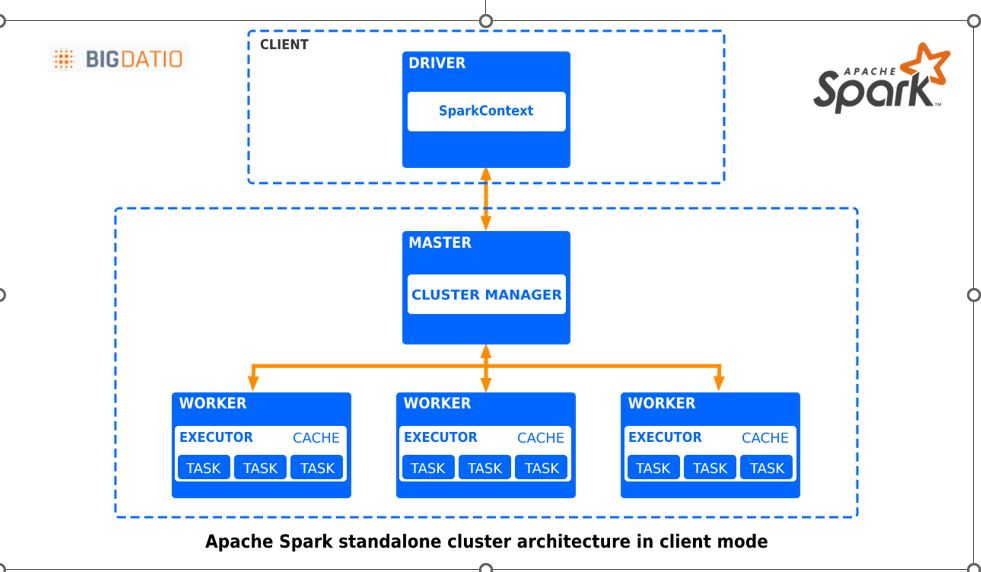

Le driver (parfois appelé « Spark Session ») distribue et planifie
les tâches entre les différents exécuteurs qui les exécutent et permettent
un traitement réparti. Il est le responsable de l’exécution du code
sur les différentes machines.

Chaque exécuteur est un processus Java Virtual Machine (JVM) distinct
dont il est possible de configurer le nombre de CPU et la quantité de
mémoire qui lui est alloué.
Une seule tâche peut traiter un fractionnement de données à la fois.*

Dans les deux environnements (Local et Cloud) nous utiliserons donc Spark
et nous l’exploiterons à travers des scripts python grâce à PySpark.

Dans la version locale de notre script nous simulerons
le calcul distribué afin de valider que notre solution fonctionne.
Dans la version cloud nous réaliserons les opérations sur un cluster de machine.

## 2.2 Transfert Learning
L'énoncé du projet nous demande également de
réaliser une première chaîne de traitement
des données qui comprendra le preprocessing et
une étape de réduction de dimension.

Il est également précisé qu'il n'est pas nécessaire
d'entraîner un modèle pour le moment.

Nous décidons de partir sur une solution de transfert learning.

Simplement, le transfert learning consiste
à utiliser la connaissance déjà acquise
par un modèle entraîné (ici MobileNetV2) pour
l'adapter à notre problématique.

Nous allons fournir au modèle nos images, et nous allons
récupérer l'avant dernière couche du modèle.
En effet la dernière couche de modèle est une couche softmax
qui permet la classification des images ce que nous ne
souhaitons pas dans ce projet.

L'avant dernière couche correspond à un vecteur
réduit de dimension (1,1,1280).

Cela permettra de réaliser une première version du moteur
pour la classification des images des fruits.

MobileNetV2 a été retenu pour sa rapidité d'exécution,
particulièrement adaptée pour le traitement d'un gros volume
de données ainsi que la faible dimensionnalité du vecteur
de caractéristique en sortie (1,1,1280)

Observations: Pour notre projet il a été spécifié un format d'image en (224x224)

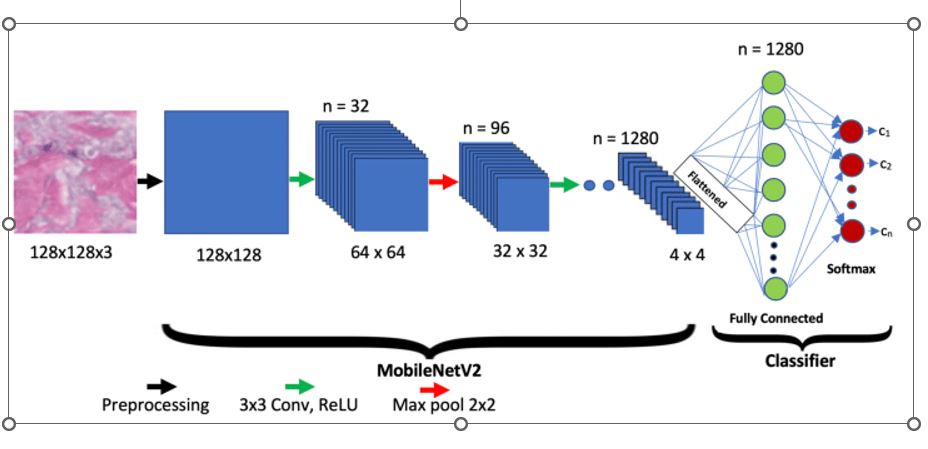

# 3. Déploiement de la solution sur le cloud

## 3.1 Choix du prestataire cloud : AWS

Le prestataire le plus connu et qui offre à ce jour l'offre <br />
la plus large dans le cloud computing est **Amazon Web Services** (AWS).<br />
Certaines de leurs offres sont parfaitement adaptées à notre problématique <br />
et c'est la raison pour laquelle j'utiliserai leurs services.

L'objectif premier est de pouvoir, grâce à AWS, <u>louer de la puissance de calcul à la demande</u>. <br />
L'idée étant de pouvoir, quel que soit la charge de travail, <br />
obtenir suffisamment de puissance de calcul pour pouvoir traiter nos images, <br />
même si le volume de données venait à fortement augmenter.

De plus, la capacité d'utiliser cette puissance de calcul à la demande <br />
permet de diminuer drastiquement les coûts si l'on compare les coûts d'une location <br />
de serveur complet sur une durée fixe (1 mois, 1 année par exemple).

## 3.2 Choix de la solution technique : EMR


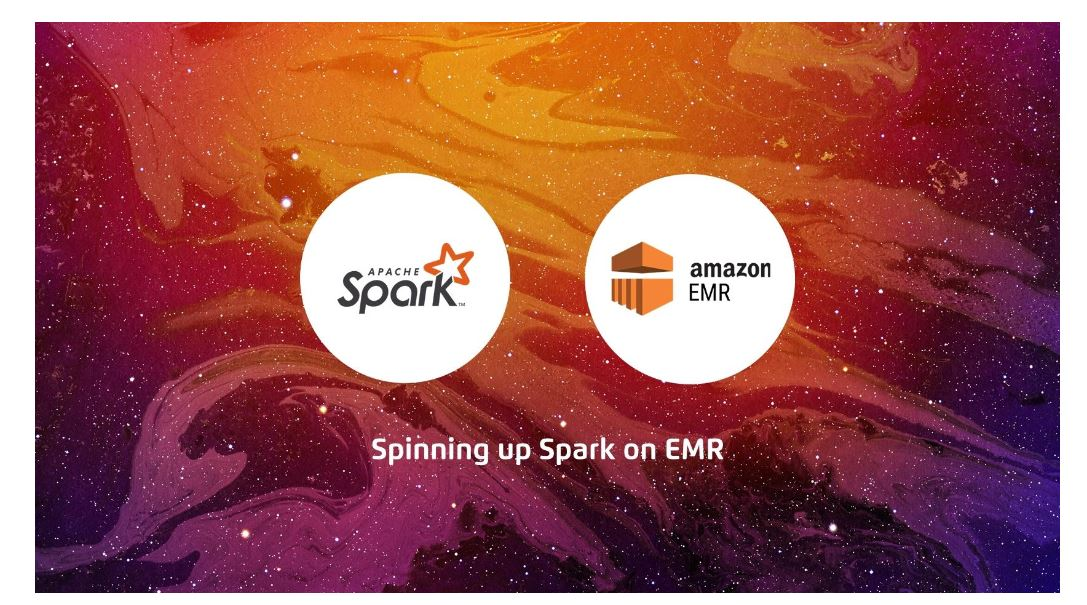

Plusieurs solutions s'offre à nous :
1. Solution **IAAS** (Infrastructure AS A Service)
 - Dans cette configuration **AWS** met à notre disposition des serveurs vierges <br />
   sur lequel nous avons un accès en administrateur, ils sont nommés **instance EC2**.<br />
   Pour faire simple, nous pouvons avec cette solution reproduire pratiquement <br />
   à l'identique la solution mis en œuvre en local sur notre machine.<br />
   <u>On installe nous-même l'intégralité des outils puis on exécute notre script</u> :
  - Installation de **Spark**, **Java** etc.
  - Installation de **Python** (via Anaconda par exemple)
  - Installation de **Jupyter Notebook**
  - Installation des **librairies complémentaires**
  - Il faudra bien évidement veiller à **implémenter les librairies 
    nécessaires à toutes les machines (workers) du cluster**
  - <u>Avantages</u> :
      - Liberté totale de mise en œuvre de la solution
      - Facilité de mise en œuvre à partir d'un modèle qui s'exécute en local sur une machine Linux
  - <u>Inconvénients</u> :
      - Cronophage
          - Nécessité d'installer et de configurer toute la solution
      - Possible problèmes techniques à l'installation des outils (des problématiques qui <br />
        n'existaient pas en local sur notre machine peuvent apparaitre sur le serveur EC2)
      - Solution non pérenne dans le temps, il faudra veiller à la mise à jour des outils <br />
        et éventuellement devoir réinstaller Spark, Java etc. 
2. Solution **PAAS** (Plateforme As A Service)
 - **AWS** fournit énormément de services différents, dans l'un de ceux-là <br />
   il existe une offre qui permet de louer des **instances EC2** <br />
   avec des applications préinstallées et configurées : il s'agit du **service EMR**.
 - **Spark** y sera déjà installé
 - Possibilité de demander l'installation de **Tensorflow** ainsi que **JupyterHub**
 - Possibilité d'indiquer des **packages complémentaires** à installer <br />
   à l'initialisation du serveur **sur l'ensemble des machines du cluster**.
 - <u>Avantages</u> :
     - Facilité de mise en œuvre
         - Il suffit de très peu de configuration pour obtenir <br />
           un environnement parfaitement fonctionnel
     - Rapidité de mise en œuvre
         - Une fois la première configuration réalisée, il est très facile <br />
           et très rapide de recréer des clusters à l'identique qui seront <br />
           disponibles presque instantanément (le temps d'instancier les <br />
           serveurs soit environ 15/20 minutes)
     - Solutions matérielless et logicielles optimisées par les ingénieurs d'AWS
         - On sait que les versions installées vont fonctionner <br />
           et que l'architecture proposée est optimisée
     - Stabilité de la solution
    - Solution évolutive
        Il est facile d’obtenir à chaque nouvelle instanciation une version à jour <br />
        de chaque package, en étant garanti de leur compatibilité avec le reste de l’environnement.
  - Plus sécurisé
	- Les éventuels patchs de sécurité seront automatiquement mis à jour <br />
      à chaque nouvelle instanciation du cluster EMR.
 - <u>Inconvénients</u> :
     - Peut-être un certain manque de liberté sur la version des packages disponibles ? <br />
       Même si je n'ai pas constaté ce problème.
   

Je retiens la solution **PAAS** en choisissant d'utiliser <br />
le service **EMR** d'Amazon Web Services.<br />
Je la trouve plus adaptée à notre problématique et permet <br />
une mise en œuvre qui soit à la fois plus rapide et <br />
plus efficace que la solution IAAS.


## 3.3 Choix de la solution de stockage des données : Amazon S3

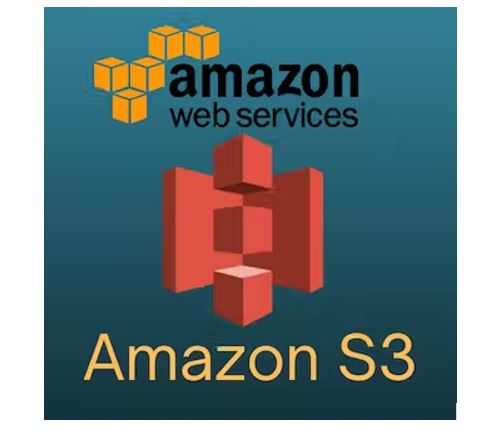

Amazon propose une solution très efficace pour la gestion du stockage des données : Amazon S3.
S3 pour Amazon Simple Storage Service.

Il pourrait être tentant de stocker nos données sur l'espace alloué par le serveur EC2,
mais si nous ne prenons aucune mesure pour les sauvegarder ensuite sur un autre support,
les données seront perdues lorsque le serveur sera résilié (on résilie le serveur lorsqu'on
ne s'en sert pas pour des raisons de coût).
De fait, si l'on décide d'utiliser l'espace disque du serveur EC2 il faudra imaginer
une solution pour sauvegarder les données avant la résiliation du serveur. De plus, nous serions exposés à certaines problématiques si nos données venaient à
saturer l'espace disponible de nos serveurs (ralentissements, disfonctionnements).

Utiliser Amazon S3 permet de s'affranchir de toutes ces problématiques.
L'espace disque disponible est illimité, et il est indépendant de nos serveurs EC2.
L'accès aux données est très rapide car nous restons dans l'environnement d'AWS
et nous prenons soin de choisir la même région pour nos serveurs EC2 et S3.

De plus, comme nous le verrons il est possible d'accéder aux données sur S3
de la même manière que l'on accède aux données sur un disque local.
Nous utiliserons simplement un PATH au format s3://... .

## 3.4 Choix du management de l'environnement analytique

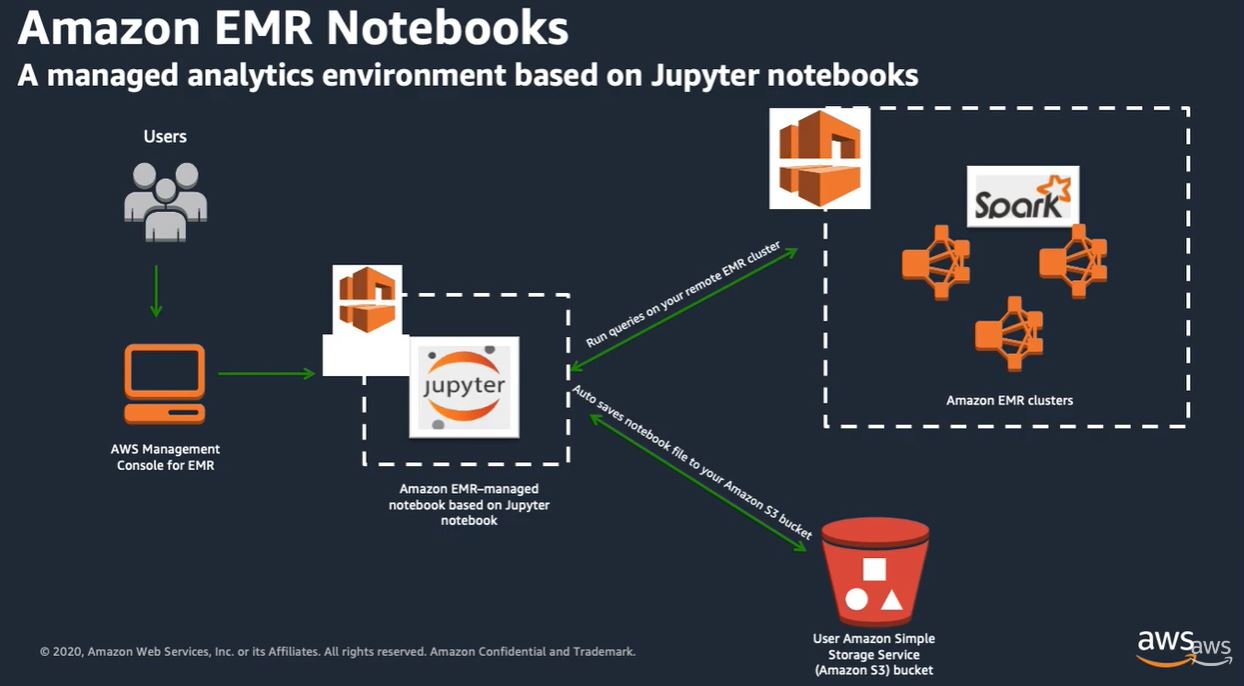

## 3.5 Configuration de l'environnement de travail

Dans ce projet il faut que l'utilisateur ait à minima un contrôle total sur le service S3.

<u>La gestion des utilisateurs et de leurs droits s'effectue via le service **AMI**</u> d'AWS.

Une fois l'utilisateur créé et ses autorisations configurées nous créons une **paire de clés** <br />
qui nous permettra de nous **connecter sans à avoir à devoir saisir systématiquement notre login/mot de passe**.<br />



## 3.6 Upload de nos données sur S3

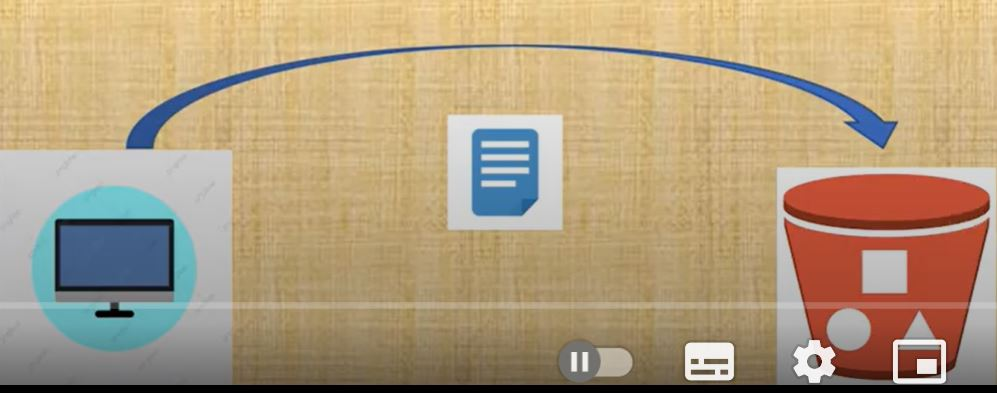

Nos outils sont configurés. <br />
Il faut maintenant uploader nos données de travail sur Amazon S3.

Ici aussi les étapes sont décrites avec précision <br />
dans le cours [Réalisez des calculs distribués sur des données massives / Stockez des données sur S3](https://openclassrooms.com/fr/courses/4297166-realisez-des-calculs-distribues-sur-des-donnees-massives/4308691-stockez-des-donnees-sur-s3)

Je décide de n'uploader que les données contenues dans le dossier **Test** du [jeu de données du projet](https://www.kaggle.com/moltean/fruits/download)


La première étape consiste à **créer un bucket sur S3** <br />
dans lequel nous uploaderons les données du projet:
- **aws s3 mb s3://p8-data**

On vérifie que le bucket à bien été créé
- **aws s3 ls**
 - Si le nom du bucket s'affiche alors c'est qu'il a été correctement créé.

On copie ensuite le contenu du dossier "**Test**" <br />
dans un répertoire "**Test**" sur notre bucket "**p8-data**":
1. On se place à l'intérieur du répertoire **Test**
2. **aws sync . s3://p8-data/Test**

La commande **sync** est utile pour synchroniser deux répertoires.

<u>Nos données du projet sont maintenant disponibles sur Amazon S3</u>.

## 3.7 Configuration du serveur EMR

Une fois encore, le cours [Réalisez des calculs distribués sur des données massives / Déployez un cluster de calculs distribués](https://openclassrooms.com/fr/courses/4297166-realisez-des-calculs-distribues-sur-des-donnees-massives/4308696-deployez-un-cluster-de-calculs-distribues) <br /> détaille l'essentiel des étapes pour lancer un cluster avec **EMR**.

<u>Je détaillerai ici les étapes particulières qui nous permettent <br />
de configurer le serveur selon nos besoins</u> :

1. Accedez à la console AWS

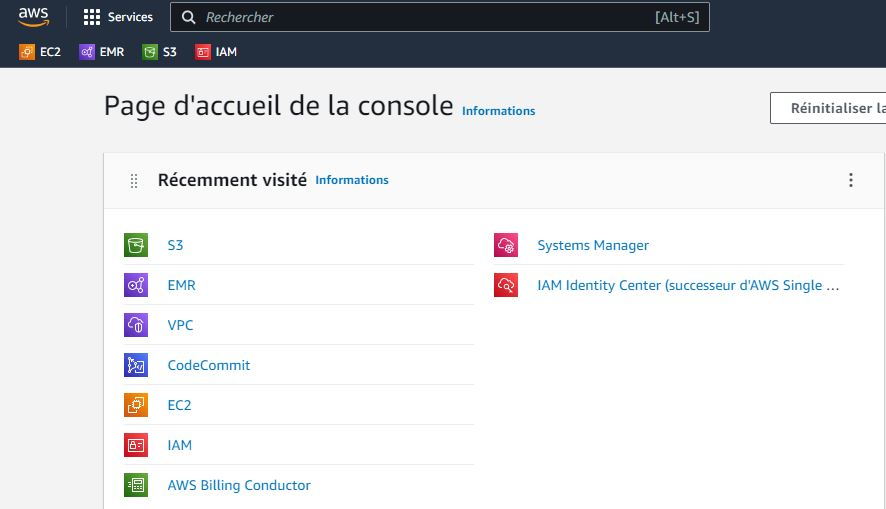

2 Selectionnez le service EMR

3 Cliquez sur Créer un cluster

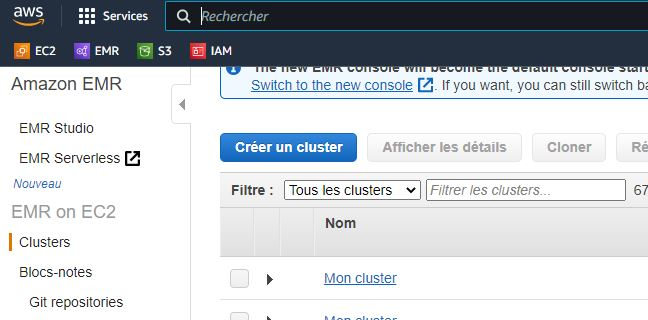

4. Acceder au Template Cluster ci-dessous

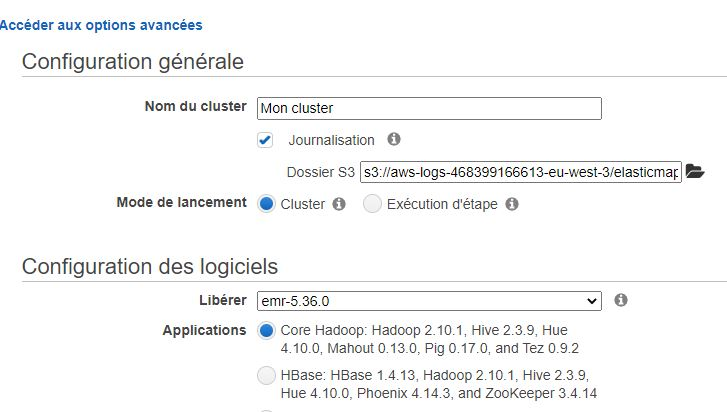

5.Cliquez sur Accéder aux options avancées

### 3.7.1 Étape 1 : Logiciels et étapes


#### 3.7.1.1 Configuration des logiciels

<u>Sélectionnez les packages dont nous aurons besoin comme dans la capture d'écran</u> :
1. Nous sélectionnons la version d'**EMR_6.1.1** par commodité relative à des beugs généré par des versions supérieures à 6.1.1 et necessitant le paramétrage du serveur jupyterEntreprise .Au dessus de la version EMR_6.1.1, nous avons identifié une serie de beug bloquants ne nous permettons pas d'accéder facilement au EMR_Notebook.
2. Nous cochons bien évidement **Hadoop** et **Spark** qui seront préinstallés dans leur version la plus récente
3. Nous aurons également besoin de **TensorFlow** pour importer notre modèle et réaliser le **transfert learning**
4. Nous travaillerons enfin avec un **notebook Jupyter** via l'application **Jupyterlab**<br />
 - Comme nous le verrons dans un instant nous allons <u>paramétrer l'application afin que les notebooks</u>, <br />
   comme le reste de nos données de travail, <u>soient enregistrés directement sur S3</u>.
   

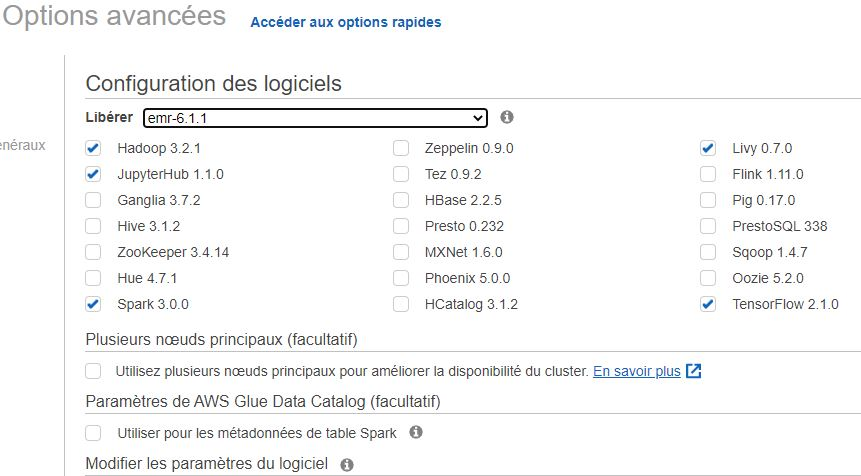

#### 3.7.1.2 Modifier les paramètres du logiciel

<u>Paramétrez la persistance des notebooks créés et ouvert via JupyterHub</u> :
- On peut à cette étape effectuer des demandes de paramétrage particulières sur nos applications. <br />
  L'objectif est, comme pour le reste de nos données de travail, <br />
  d'éviter toutes les problématiques évoquées précédemment. <br />
  C'est l'objectif à cette étape, <u>nous allons enregistrer <br />
  et ouvrir les notebooks</u> non pas sur l'espace disque de  l'instance EC2 (comme <br />
  ce serait le cas dans la configuration par défaut de JupyterHub) mais <br />
  <u>directement sur **Amazon S3**</u>.
- <u>deux solutions sont possibles pour réaliser cela</u> :
 1. Créer un **fichier de configuration JSON** que l'on **upload sur S3** et on indique ensuite le chemin d’accès au fichier JSON
 2. Rentrez directement la configuration au format JSON
 
J'ai personnellement créé un fichier JSON lors de la création de ma première instance EMR, <br />
puis lorsqu'on décide de cloner notre serveur pour en recréer un facilement à l'identique, <br />
la configuration du fichier JSON se retrouve directement copié comme dans la capture ci-dessous.

<u>Voici le contenu de mon fichier JSON</u> :  [{"classification":"jupyter-s3-conf","properties":{"s3.persistence.bucket":"p8-data","s3.persistence.enabled":"true"}}]
 Appuyez ensuite sur "**Suivant**"


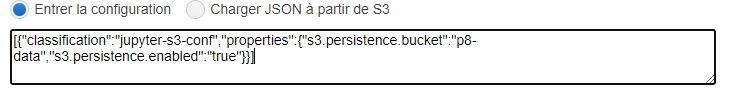

### 3.7.2 Étape 2 : Matériel

A cette étape, laissez les choix par défaut. <br />
<u>L'important ici est la sélection de nos instances</u> :

1. je choisi les instances de type **M5** qui sont des **instances de type équilibrés**
2. je choisi le type **xlarge** qui est l'instance la **moins onéreuse disponible**
 [Plus d'informations sur les instances M5 Amazon EC2](https://aws.amazon.com/fr/ec2/instance-types/m5/)
3. Je sélectionne **1 instance Maître** (le driver) et **2 instances Principales** (les workeurs) <br />
   soit **un total de 3 instance EC2**.

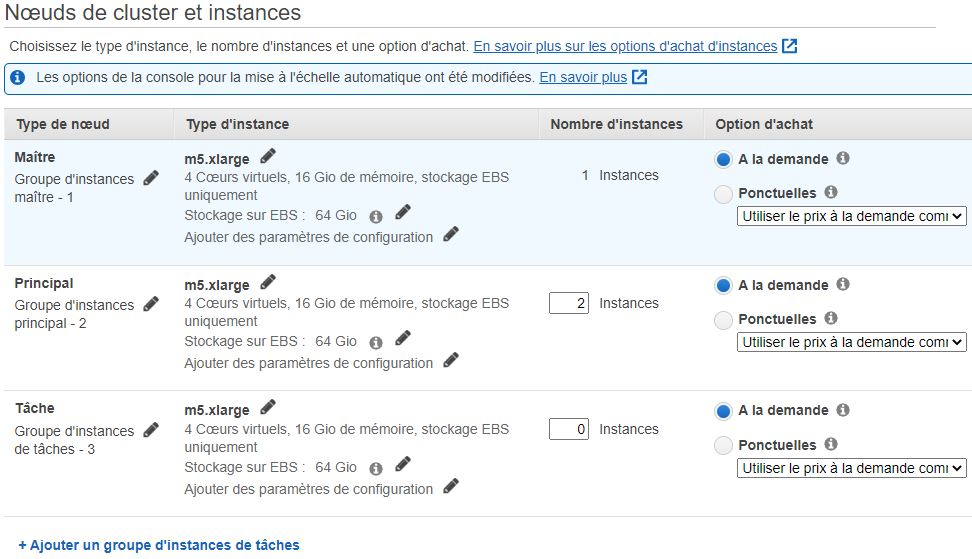

#### 3.7.3.2 Actions d'amorçage

Nous allons à cette étape **choisir les packages manquants à installer** et qui <br />
nous serons utiles dans l'exécution de notre notebook.<br />
<u>L'avantage de réaliser cette étape maintenant est que les packages <br />
installés le seront sur l'ensemble des machines du cluster</u>.

La procédure pour créer le fichier **bootstrap** qui contient <br />
l'ensemble des instructions permettant d'installer tous <br />
les packages dont nous aurons besoin est expliqué dans <br />
le cours [Réalisez des calculs distribués sur des données massives / Bootstrapping](https://openclassrooms.com/fr/courses/4297166-realisez-des-calculs-distribues-sur-des-donnees-massives/4308696-deployez-un-cluster-de-calculs-distribues#/id/r-4356490)

Nous créons donc un fichier nommé "**bootstrap-emr.sh**" que nous <u>uploadons <br />
sur S3</u>(je l’installe à la racine de mon **bucket "p8-data"**) et nous l'ajoutons <br />
comme indiqué dans la capture d'écran ci-dessous:



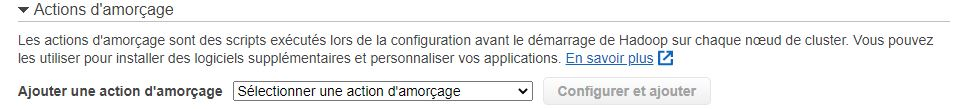

##### Sélectionnez,configurez et ajoutez une Action personnalisée

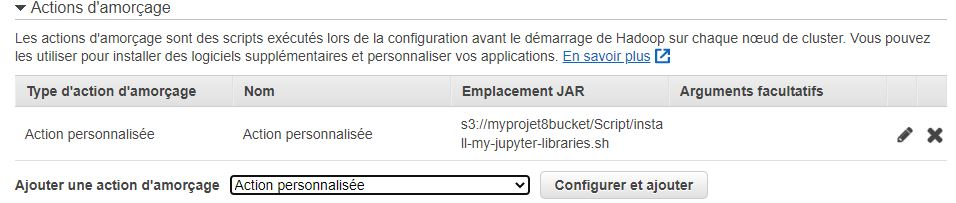

Voici le contenu du fichier **bootstrap-emr.sh**<br />

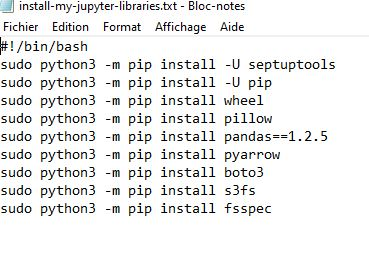

Comme on peut le constater il s'agit simplement de commande "pip install"
pour installer les bibliothèques manquantes comme réalisé en local.
Une fois encore, il est nécessaire de réaliser ces actions à cette étape
pour que les packages soient installés sur l'ensemble des machines du cluster
et non pas uniquement sur le driver, comme cela serait le cas si nous exécutions
ces commandes directement dans le notebook JupyterHub ou dans la console EMR (connecté au driver).

**setuptools** et **pip** sont mis à jour pour éviter une problématique <br />
avec l'installation du package **pyarrow**.<br />
**Pandas** a eu droit à une mise à jour majeur (1.3.0) il y a moins d'une semaine <br />
au moment de la rédaction de ce notebook, et la nouvelle version de **Pandas** <br />
nécessite une version plus récente de **Numpy** que la version installée par <br />
défaut (1.16.5) à l'initialisation des instances **EC2**. <u>Il ne semble pas <br />
possible d'imposer une autre version de Numpy que celle installé par <br />
défaut</u> même si on force l'installation d'une version récente de **Numpy** <br />
(en tout cas, ni simplement ni intuitivement).<br />
La mise à jour étant très récente <u>la version de **Numpy** n'est pas encore <br />
mise à jour sur **EC2**</u> mais on peut imaginer que ce sera le cas très rapidement <br />
et il ne sera plus nécessaire d'imposer une version spécifique de **Pandas**.<br />
En attendant, je demande <u>l'installation de l'avant dernière version de **Pandas (1.2.5)**</u>

On clique ensuite sur ***Suivant***

### 3.7.4 Étape 4 : Sécurité

#### 3.7.4.1 Options de sécurité

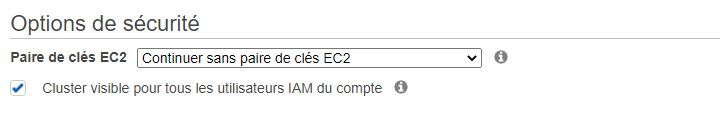

A cette étape je n'ai pas sélectionné la **paire de clés EC2** créé précédemment <br />
parce que dans mes choix techniques je ne vais pas utliser la liaison SHH pour me connecter aux clusters.<br />
Je souligne que la selection d'une paire de clé et d'une liaison SHH aurait été obligatoire pour des usages<br/>
correspondants à la la configuration d'un serveur via un Terminal Linux via une passerelle Puppy <br/>
On laisse les autres paramètres par défaut. <br />
Et enfin, on clique sur "***Créer un cluster***" <br/>

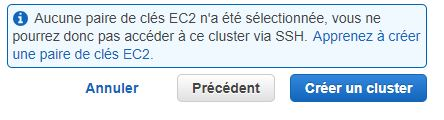

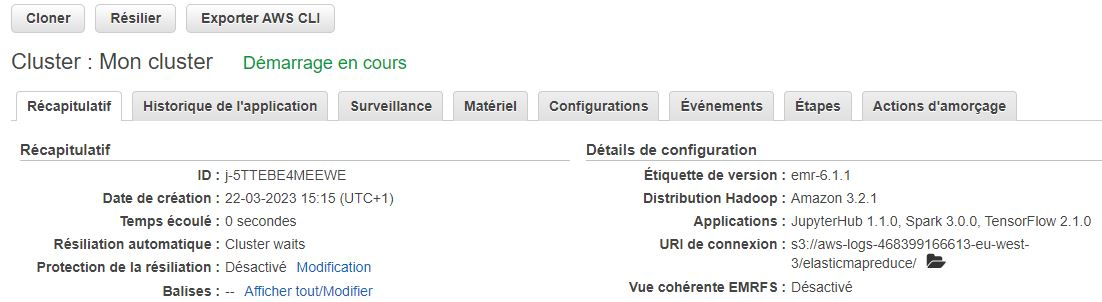

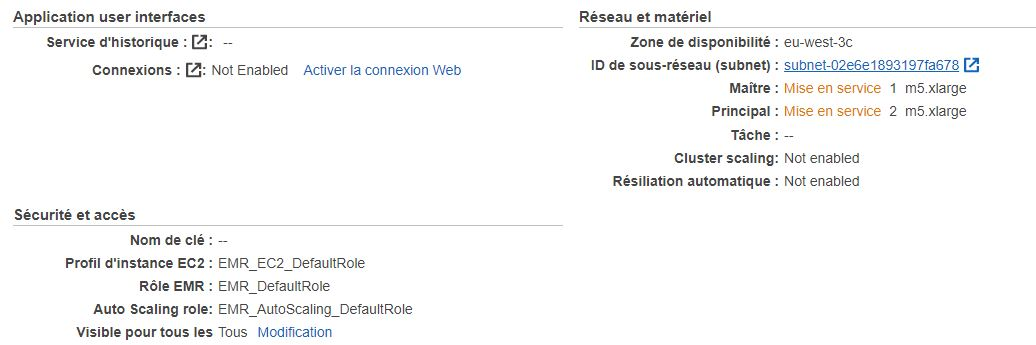

## Cluster en mode attente de démarrage.

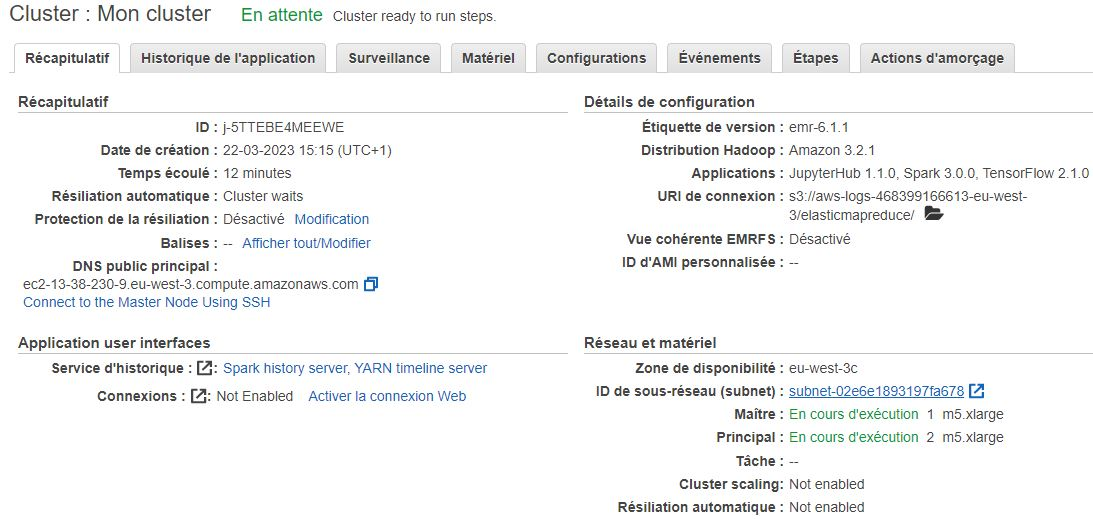

## 3.8 Interface de Programmation et Controle des jobs spark via le service EMR_Notebook JupyterLab


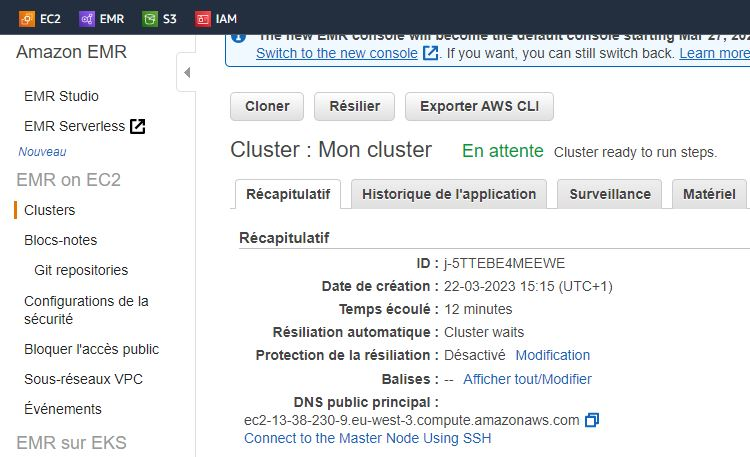

### 3.8.1 Selection du Bloc_notes

#### 1.Cliquez sur le bouton bloc note

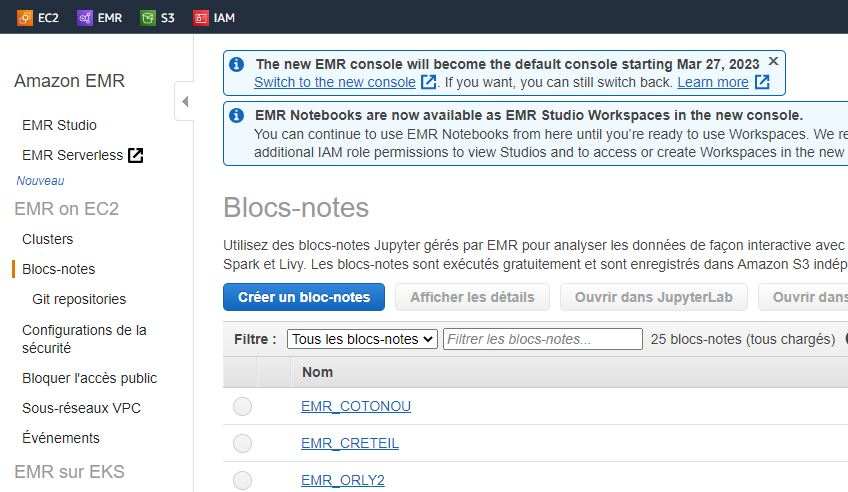

#### Créez un bloc note

D'abord créer et demarrer son cluster 
Attender qu'il soit en statut d'attente.
Cliquer sur le boutoMn Bloc-notes et on accède au menu Blocs-notes
Appuyer sur le bouton Créer bloc-notes
Accéder au template de création d'un bloc note  et choisir le bloc note en cours
Laisser tous les paramètres en défault
il est rappelé que les les clusters doivent avoir Hadoop, Spark et Livy installé
Cliquer sur créer un bloc note.

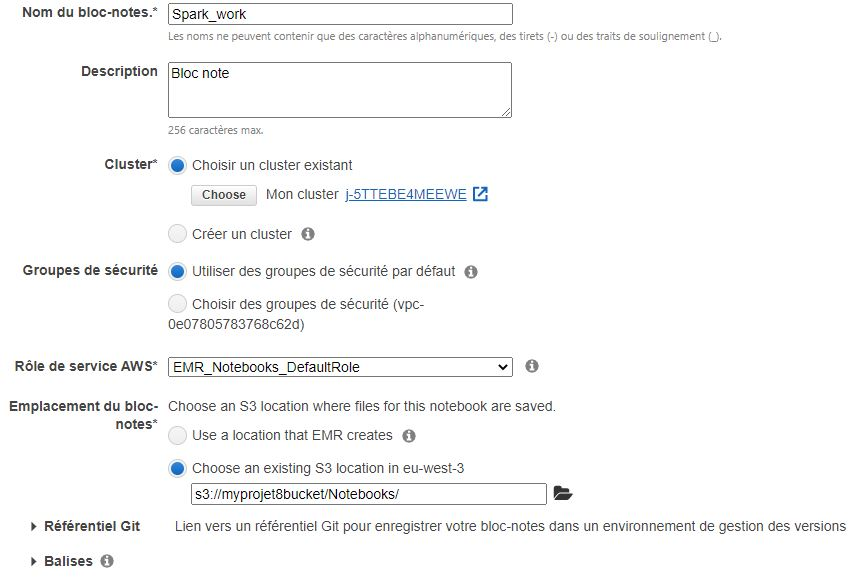

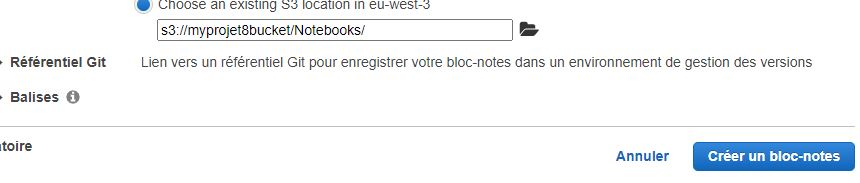


#### Cliquez sur créer un bloc note.

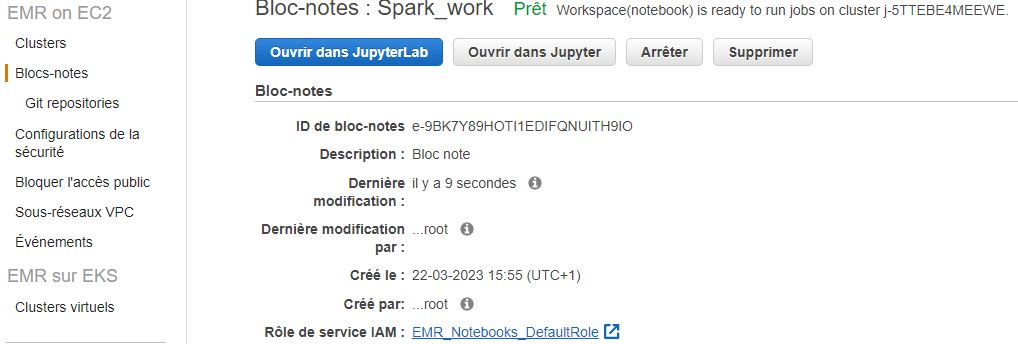

Pour se connecter à JupyterLab en vue d'exécuter notre notebook,
il faut commencer par cliquer sur le bouton Ouvrir dans JupyterLab

Nous arrivons ensuite dans un dossier vierge de notebook.<br />
Il suffit d'en créer un en cliquant sur "**le fichier créer par défault et l'ouvrir avec Notebook<br/>
Ensuite un menu deroulant de Kernel apparait.Selectionner Pyspark


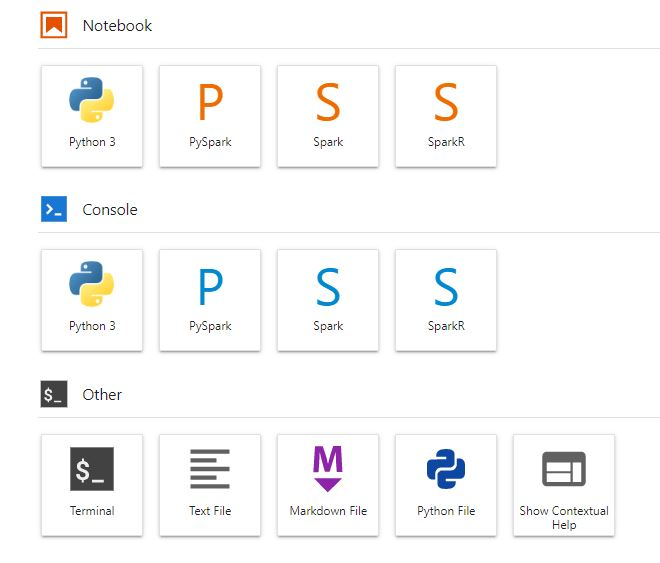

Dirigez le curseur sur le fichier ipynb crée par défaut et cliquez droit pour ouvrir avec Notebook .Ensuite, accédez au menu déroulant des Kernel .
et selectionnez Pyspark

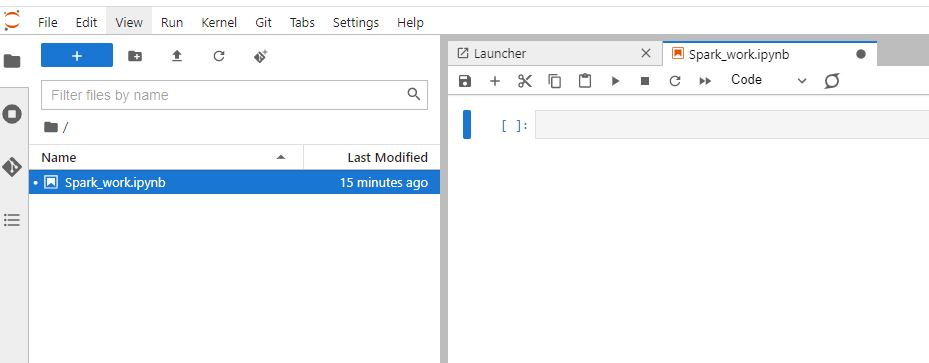


Grace à la <u>**persistance** paramétrée à l'instanciation du cluster <br />
nous sommes actuellement dans l'arborescence de notre **bucket S3**</u>
Je décide d'**importer un notebook déjà rédigé en local directement <br />
dans l'interface du EMR_Notebook sans passer par S3** et je l'ouvre depuis **l'interface JupyterLab**<br/>.


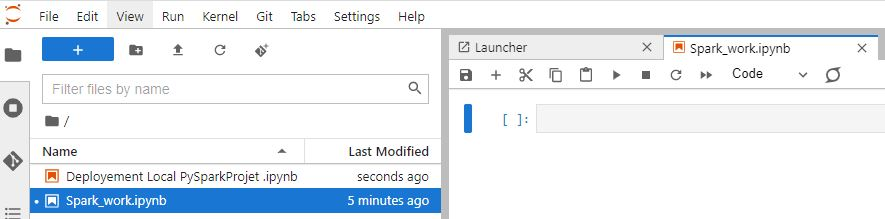

Allez sur l'onglet Kernel et changez de kernel en passant du Python 3 à Pyspark.
Ensuite allez sur l'onglet Run et selectionnez Run All Cells afin de lancer  l'application

Le Master Node reçoit la commande et en retour signale la bonne exécution des calculs par le message suivant:

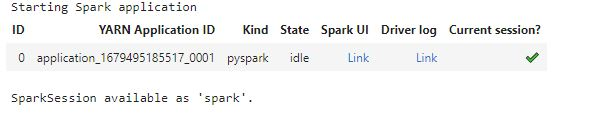

### 3.8.2 Architecture applicative Hadoop_Yarn

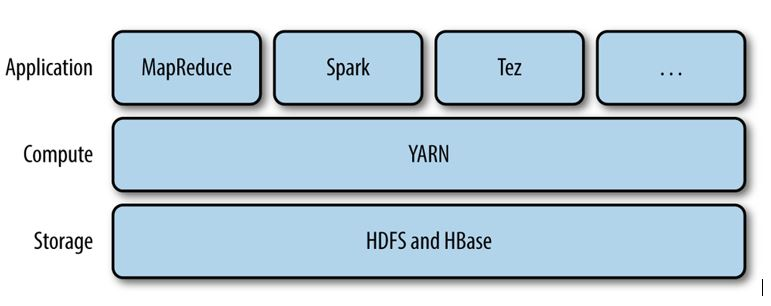

## 3.9 Surveillance et Instrumentation des applications SPARK dans le Cloud

## 3.9.1Interfaces Web

Chaque SparkContext lance une Web UI , par défaut sur le port 4040, qui affiche des informations utiles sur l'application. Ceci comprend:

----->Une liste des étapes et des tâches du planificateur

----->Un résumé des tailles RDD et de l'utilisation de la mémoire

----->Informations environnementales.

----->Informations sur les exécuteurs testamentaires

Vous pouvez accéder à cette interface en ouvrant simplement http://<driver-node>:4040 dans un navigateur Web. Si plusieurs SparkContexts s'exécutent sur le même hôte, ils se lieront à des ports successifs commençant par 4040 (4041, 4042, etc.).

### 3.10.1 L'Interface Web Livy 

Grace au service EMR JupyterLab Notebook ,en lieu et place d'utiliser une paire de clé afin d'établir un tunnel de communication SSH avec le Master Node du Cluster nous accedons  à l'API Livy qui communique directement avec le cluster et peut nous livrer un historique de l'application SPARK dans un navigateur Web au port Localhost:4040

### 3.11.1 AWS_ Architecture client -serveur : Notebook JupyterLab et API_Livy

L'intégration réseau Notebook JupyterLab et API_Livy sur AWS s'illustre par le schema ci-dessous

Pourquoi livy + sparkmagic ?
sparkmagic est un client de livy utilisant avec Jupyter notebook. Lorsque nous écrivons du code Spark sur
notre client Jupyter local, sparkmagic exécute le travail Spark via livy. À l'aide de sparkmagic + bloc-notes Jupyter, 
les scientifiques des données peuvent utiliser Spark à partir de leur propre bloc-notes Jupyter, 
qui s'exécute sur leur hôte local. Nous n'avons besoin d'aucune configuration Spark provenant du cluster CDH.
Nous pouvons donc exécuter le travail Spark dans un cluster comme s'il s'exécutait sur une machine locale.

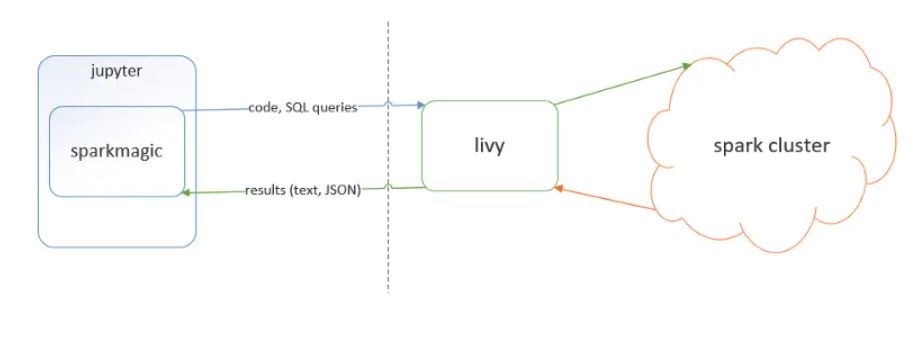

## 3.11.1 AWS_ Architecture client -serveur + Gestionnaire de ressources  : Notebook JupyterLab, API_Livy +Yarn ou Meseos

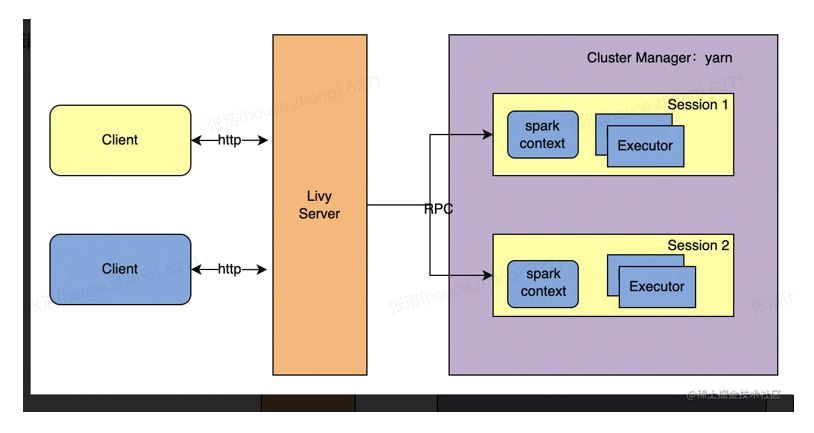

# 4 Affichage des Résultats et Interprétation des jobs spark

## 4.1 Selection du compartiment Application User Interfaces du Cluster

Allez sur Application user interfaces du Cluster et Cliquez sur le lien YARN timeline server

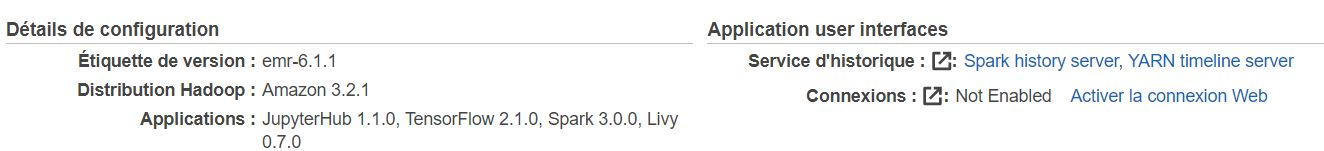

## 4.2 Web_Livy_ Spark UI

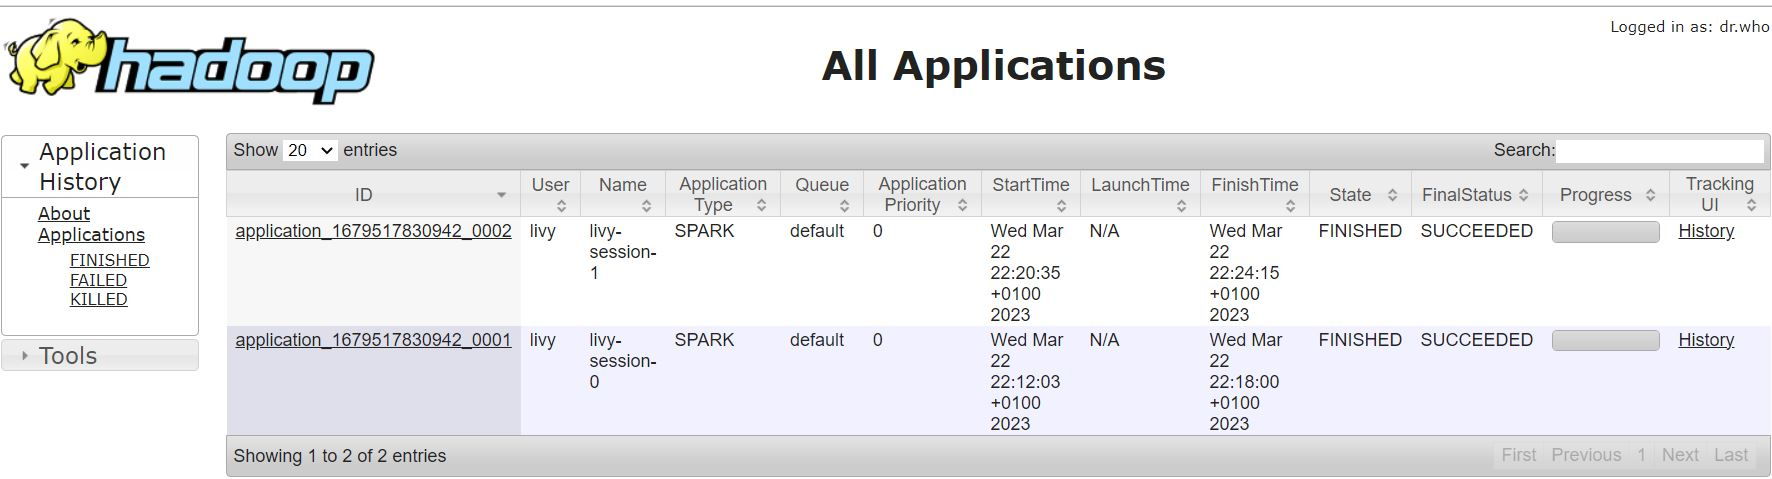

# 5 Fin des processus Jobs Spark

## 5.1 Note de deconnexion du Cluster

Arretez le Cluster en résiliant la location du serveur.

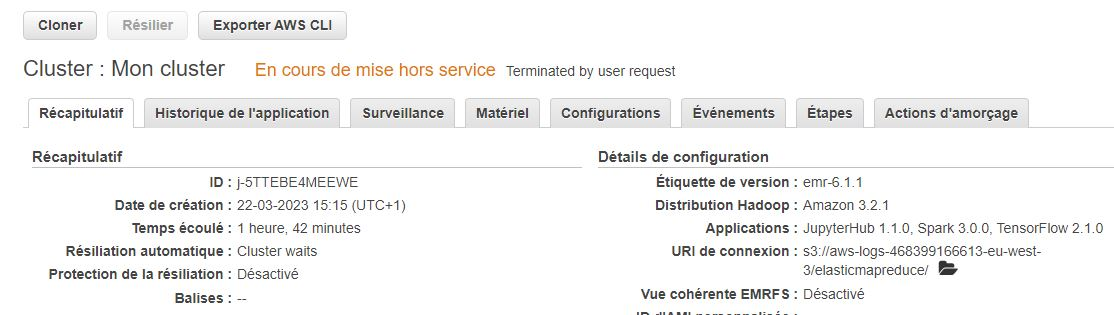

## 5.2 Note de deconnexion du service EMR NOTEBOOK

Sur le Web navigateur cliquez sur l'onglet jupyterLab Notebook

Sur la page Notebook cliquez sur File et selectionnez l'option Shut Down


## 5.3 Processus terminé et  couts imputables uniquement au temps de location des clusters selon les dernières informations commerciales AWS 

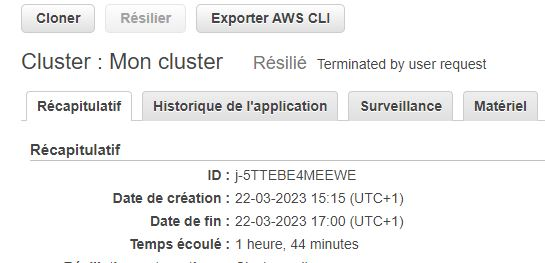

# 6 Bilan

Tout d'abord,en suivant à la lettre ce mode opératoire remodelé ,votre Appli_Spark peut etre lancée en moins de 20 minutes

Ensuite,dans un environnement local  windows 11,j'ai fait face à une serie de beug qui ne me permettait pas d'obtenir à la lettre 
les resultats relatifs aux actions prévues par le mode opératoire suggéré par OpenClassrooms.

Etant donné la multiciplité des solutions d'intégration des pipelines de traitement Big Data dans le Cloud,j'ai donc
fait le choix de remodeler le mode opératoire OpenClassrooms avec les solutions techniques qui devaient me conduire 
à déployer notre solution dans le but d'atteindre les resultats finaux ciblés dans le Cloud .

Bien que déçu d'avoir perdu du temps et dépensé de l'argent pour l'exploration de l'environnement Cloud AWS et redaction  du mode opératoire adéquat,je suis arrivé à la conclusion suivante:<<Pour l'exercice d'un métier de Data Scientist,la compétence Cloud est une compétence indispensable!!.>>Par conséquent ,je me réjouis d'avoir découvert un espace virtuel(Amazon Web Services) ou la créativité n'a plus de limite pour les experts du numérique.

Par ailleurs,l'objectif de cette intégration était de bypasser les prérequis suivants en vue d'atteindre sans détours les résultats escomptés: 

    ****  installer et de configurer AWS Cli,il s'agit de l'interface en ligne de commande d'AWS.
          Elle nous permet d'interagir avec les différents services d'AWS, comme S3 par exemple.
          
    ****  Il faut également configurer l'accès SSH à nos futurs serveurs EC2.
          Ici aussi, via un système de clés qui nous dispense de devoir nous authentifier "à la main" à chaque connexion.

Cependant ,ces prérequis se revèlent indispensables à appliquer en vue d'étendre les capacités de configuration 
d'un service AWS Cloud via un terminal distant Linux.

Enfin,merci OpenClassrooms pour ce pari reussi et relatif à une montée en compétences en Data Science,Big Data et Cloud Computing!!